## Installing the Dependencies

In [3]:
pip install langgraph


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


## Importing dependencies

In [4]:
from langgraph.graph import StateGraph, END
from typing import TypedDict, Optional
from IPython.display import Image, display
from typing_extensions import Annotated
import operator


## Defining the State and Creating Nodes

In [5]:
class ParallelState(TypedDict):
    results: Annotated[list[str], operator.add]  

def step1(state: ParallelState) -> ParallelState:
    return {"results": ["step1 done"]}

def step2(state: ParallelState) -> ParallelState:
    return {"results": ["step2 done"]}

def merge(state: ParallelState) -> ParallelState:
    print("Merged results:", state["results"])
    return state

## Building the Graph by adding nodes and edges

In [6]:
# Build graph
graph = StateGraph(ParallelState)
graph.add_node("step1", step1)
graph.add_node("step2", step2)
graph.add_node("merge", merge)

graph.set_entry_point("step1")
graph.add_edge("step1", "merge")
graph.add_edge("step2", "merge")

# Add parallel edge: entry triggers both step1 and step2
graph.add_edge("__start__", "step2")

graph.add_edge("merge", END)


## Compiling the Workflow

In [7]:
app = graph.compile()


## Visual Representation of the Graph

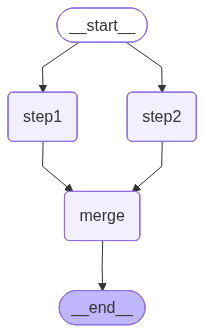

In [8]:
display(Image(data=app.get_graph().draw_mermaid_png()))


## Invoking the Workflow

In [9]:
state = {"step1_done": None, "step2_done": None, "merged": None}
app.invoke(state)

Merged results: ['step1 done', 'step2 done']


{'results': ['step1 done', 'step2 done', 'step1 done', 'step2 done']}